In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import joblib

In [274]:
# pip install feature_engine

In [275]:
df = pd.read_csv("disaster_cleaned.csv")

In [276]:
df.shape

(2992, 15)

In [277]:
df.sample()

,date,event_name,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type
928,20-08-2024,Tropical Storm Jongdari,asia,KOR,36.149009,125.5,27.8,30.4,25.4,81,10.1,8.75,7,Light rain shower,SW


In [278]:
df.drop_duplicates(inplace=True)

In [279]:
df

,date,event_name,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type
0,05-09-2024,NORTHERN ALASKA,nar,USA,65.881200,-152.217900,0.6,3.0,-3.1,97,8.3,0.03,1,Light snow,EQ
1,05-09-2024,"Drought in Guatemala, Honduras, Mexico, Nicaragua",nar,MEX,18.500000,-99.000000,28.2,36.6,20.0,31,21.2,1.85,8,Patchy rain possible,DR
2,05-09-2024,Drought in Canada,nar,CAN,53.500000,-116.000000,12.8,22.2,3.8,46,15.1,0.00,6,Sunny,DR
3,04-09-2024,CALIFORNIA-NEVADA BORDER REGION,nar,USA,36.523300,-115.540000,13.5,20.1,6.8,24,15.8,0.00,6,Sunny,EQ
4,04-09-2024,CENTRAL CALIFORNIA,nar,USA,37.282500,-119.999000,14.8,21.5,8.8,61,8.3,0.00,6,Sunny,EQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,09-10-2024,Wildfire in Australia 1022015,aus,AUS,-15.348515,133.938843,27.7,36.1,19.4,34,24.8,0.00,10,Partly cloudy,WF
2988,09-08-2024,Wildfire in Australia 1022114,aus,AUS,-16.035644,136.440754,25.2,33.4,19.7,60,33.5,0.00,9,Sunny,WF
2989,09-08-2024,Wildfire in Australia 1022034,aus,AUS,-15.354934,131.140822,28.4,37.0,19.8,38,23.0,0.00,10,Sunny,WF
2990,15-08-2024,Flood in Maldives,ocean,MDV,3.281714,73.247658,27.5,27.8,27.3,78,36.7,9.30,6,Light rain shower,FL


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2992 non-null   object 
 1   event_name       2992 non-null   object 
 2   continent        2992 non-null   object 
 3   country_code     2992 non-null   object 
 4   latitude         2992 non-null   float64
 5   longitude        2992 non-null   float64
 6   temperature      2992 non-null   float64
 7   max_temperature  2992 non-null   float64
 8   min_temperature  2992 non-null   float64
 9   humidity         2992 non-null   int64  
 10  wind_speed       2992 non-null   float64
 11  precipitation    2992 non-null   float64
 12  uv_index         2992 non-null   int64  
 13  condition        2992 non-null   object 
 14  event_type       2992 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 350.8+ KB


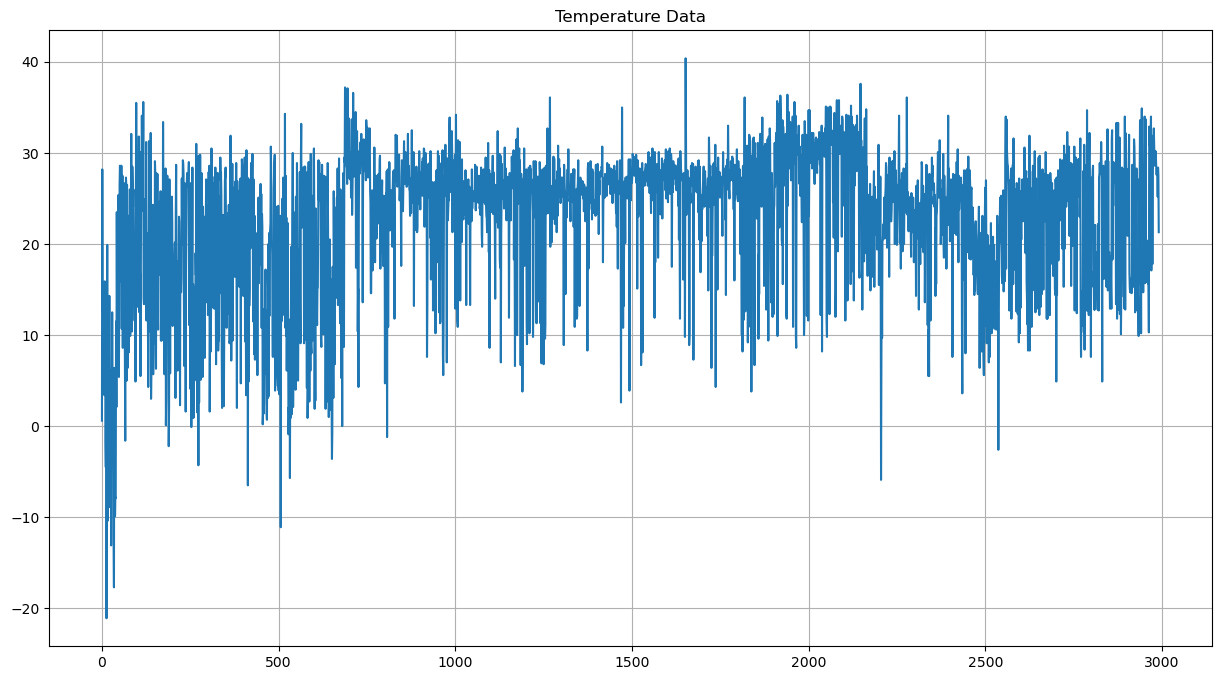

In [313]:
plt.figure(figsize=(15, 8))  # Set the figure size to 15 inches by 8 inches
plt.plot(df['temperature'])
plt.title('Temperature Data')
plt.grid(True)
plt.show()

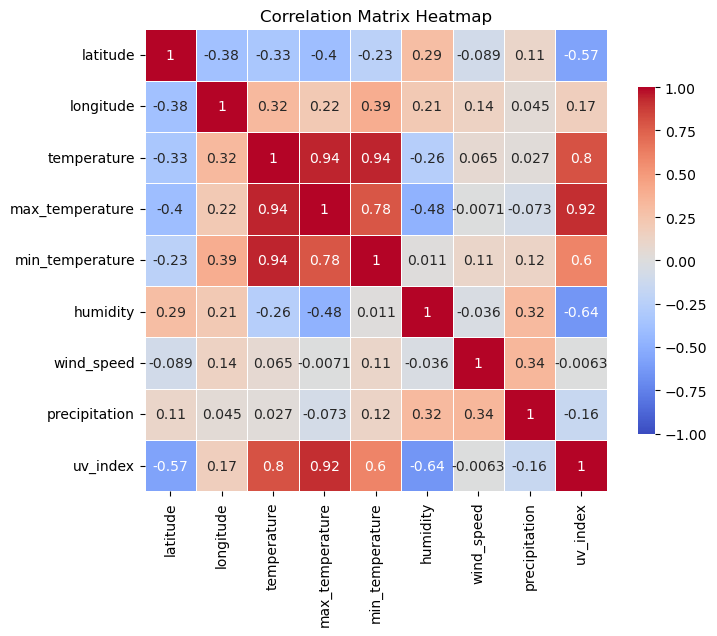

In [281]:
numeric_df = df.select_dtypes(include=['number']).dropna()
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix Heatmap")
plt.show()

In [282]:
df = df.drop('event_name',axis=1)

In [283]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2992 non-null   datetime64[ns]
 1   continent        2992 non-null   object        
 2   country_code     2992 non-null   object        
 3   latitude         2992 non-null   float64       
 4   longitude        2992 non-null   float64       
 5   temperature      2992 non-null   float64       
 6   max_temperature  2992 non-null   float64       
 7   min_temperature  2992 non-null   float64       
 8   humidity         2992 non-null   int64         
 9   wind_speed       2992 non-null   float64       
 10  precipitation    2992 non-null   float64       
 11  uv_index         2992 non-null   int64         
 12  condition        2992 non-null   object        
 13  event_type       2992 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(

In [284]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop('date', axis=1)

In [285]:
df.head(2)

,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type,year,month,day
0,nar,USA,65.8812,-152.2179,0.6,3.0,-3.1,97,8.3,0.03,1,Light snow,EQ,2024,5,9
1,nar,MEX,18.5000,-99.0000,28.2,36.6,20.0,31,21.2,1.85,8,Patchy rain possible,DR,2024,5,9


In [286]:
label_encoder = LabelEncoder()
df['event_type_encoded'] = label_encoder.fit_transform(df['event_type'])
y = df['event_type_encoded']
y

0       1
1       0
2       0
3       1
4       1
       ..
2987    9
2988    9
2989    9
2990    3
2991    1
Name: event_type_encoded, Length: 2992, dtype: int32

In [287]:
df.sample()

,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type,year,month,day,event_type_encoded
1520,asia,JPN,36.0,142.9,23.3,23.7,22.9,69,28.1,0.19,5,Patchy rain possible,TC,2024,9,30,6


In [288]:
X=df.iloc[:,2:17]

In [289]:
X = X.drop(['condition','event_type'], axis=1)

In [290]:
X

,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,year,month,day,event_type_encoded
0,65.881200,-152.217900,0.6,3.0,-3.1,97,8.3,0.03,1,2024,5,9,1
1,18.500000,-99.000000,28.2,36.6,20.0,31,21.2,1.85,8,2024,5,9,0
2,53.500000,-116.000000,12.8,22.2,3.8,46,15.1,0.00,6,2024,5,9,0
3,36.523300,-115.540000,13.5,20.1,6.8,24,15.8,0.00,6,2024,4,9,1
4,37.282500,-119.999000,14.8,21.5,8.8,61,8.3,0.00,6,2024,4,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,-15.348515,133.938843,27.7,36.1,19.4,34,24.8,0.00,10,2024,9,10,9
2988,-16.035644,136.440754,25.2,33.4,19.7,60,33.5,0.00,9,2024,9,8,9
2989,-15.354934,131.140822,28.4,37.0,19.8,38,23.0,0.00,10,2024,9,8,9
2990,3.281714,73.247658,27.5,27.8,27.3,78,36.7,9.30,6,2024,8,15,3


In [291]:
y

0       1
1       0
2       0
3       1
4       1
       ..
2987    9
2988    9
2989    9
2990    3
2991    1
Name: event_type_encoded, Length: 2992, dtype: int32

In [292]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(2992, 13)

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [294]:
dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini',
    splitter='random',
    max_depth=5)

dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:",dt_accuracy)

Decision Tree Accuracy: 0.9643652561247216


In [295]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00       279
           2       1.00      1.00      1.00        13
           3       0.89      1.00      0.94        72
           4       0.93      0.84      0.88        63
           5       0.90      0.98      0.94       181
           6       1.00      0.28      0.44        25
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00       208

    accuracy                           0.96       898
   macro avg       0.97      0.91      0.92       898
weighted avg       0.97      0.96      0.96       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


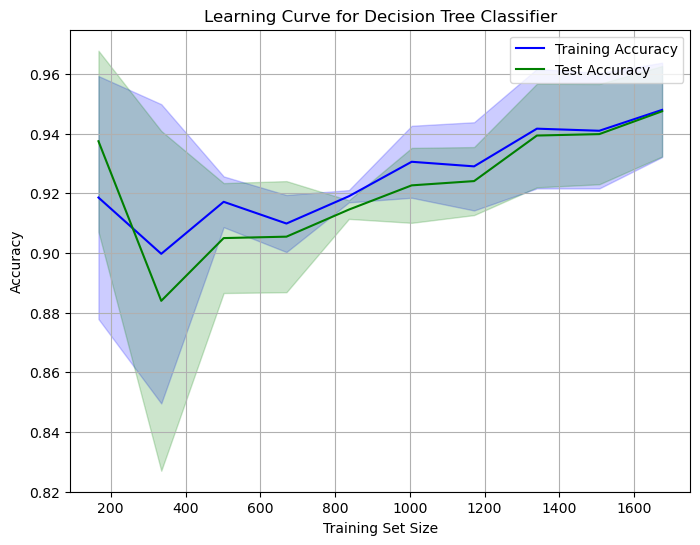

In [296]:
train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,                                 
    scoring='accuracy',                  
    n_jobs=-1                       
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [297]:
knn_classifier = KNeighborsClassifier(n_neighbors=7,
    weights='uniform',
    algorithm='auto')

knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 86.97%


In [298]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        52
           1       0.91      0.96      0.93       279
           2       0.75      0.23      0.35        13
           3       0.79      0.61      0.69        72
           4       0.79      0.76      0.77        63
           5       0.77      0.95      0.85       181
           6       0.78      0.28      0.41        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.99      0.99      0.99       208

    accuracy                           0.87       898
   macro avg       0.66      0.54      0.57       898
weighted avg       0.86      0.87      0.86       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


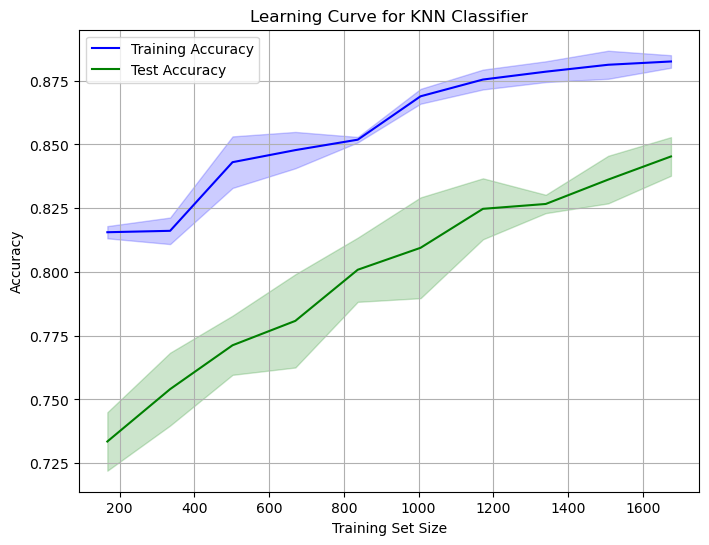

In [299]:
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),  
    cv=5,                                  
    scoring='accuracy',                 
    n_jobs=-1                             
)

# Calculate the mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")

# Plot the fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

# Label the axes and show the plot
plt.title("Learning Curve for KNN Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [324]:
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random forest:",accuracy)

Random forest: 0.9097995545657016


In [301]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        52
           1       0.93      1.00      0.96       279
           2       0.00      0.00      0.00        13
           3       0.84      0.85      0.84        72
           4       0.91      0.84      0.88        63
           5       0.81      0.98      0.89       181
           6       1.00      0.04      0.08        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       1.00      1.00      1.00       208

    accuracy                           0.91       898
   macro avg       0.65      0.54      0.55       898
weighted avg       0.90      0.91      0.89       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


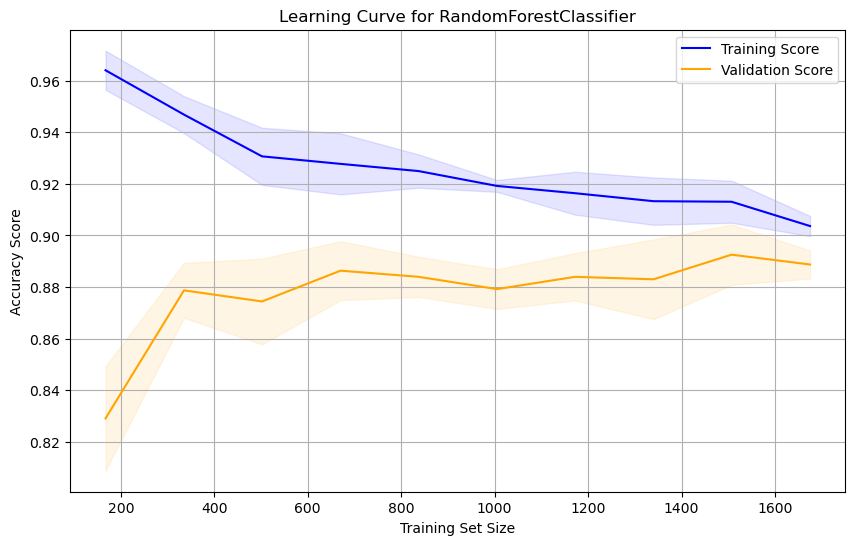

In [302]:
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Validation Score", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for RandomForestClassifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [304]:
# def predict_event_type(latitude, longitude, temperature, max_temp,min_temp, humidity, wind_speed, precipitation, uv_index,year,month,day):
#     user_input = [[temperature, humidity, min_temp, max_temp, precipitation, wind_speed, latitude, longitude, uv_index,year,month,day]]
#     user_input_scaled = scaler.transform(user_input)
#     encoded_prediction = rf.predict(user_input_scaled)
#     decoded_prediction = label_encoder.inverse_transform([int(encoded_prediction)])
#     return decoded_prediction[0]

# predicted_event = predict_event_type(14.5,-99,28.2,30.6,3.0,21,21.2,1.15,8,2024,12,12)
# print("Predicted event type:", predicted_event)

In [305]:
log_reg = LogisticRegression(solver='liblinear',random_state=42)

log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, log_pred)
print("Accuracy:",accuracy)

conf_matrix = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.8073496659242761
Confusion Matrix:


array([[  9,  43,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 276,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   8,   0,   0,   0,   5,   0,   0,   0,   0],
       [  0,  29,   0,   1,   1,  41,   0,   0,   0,   0],
       [  0,   1,   0,   0,  53,   9,   0,   0,   0,   0],
       [  0,   0,   1,   0,   4, 175,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,  21,   4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0, 207]], dtype=int64)

In [306]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.90      0.17      0.29        52
           1       0.77      0.99      0.87       279
           2       0.00      0.00      0.00        13
           3       1.00      0.01      0.03        72
           4       0.90      0.84      0.87        63
           5       0.69      0.97      0.80       181
           6       0.80      0.16      0.27        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.99      1.00      0.99       208

    accuracy                           0.81       898
   macro avg       0.60      0.41      0.41       898
weighted avg       0.82      0.81      0.75       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


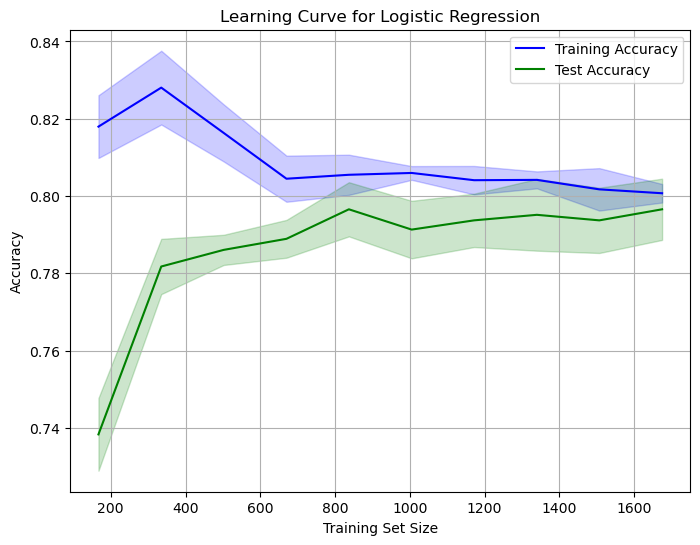

In [307]:
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                                  
    scoring='accuracy',                    
    n_jobs=-1                             
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [319]:
model = SVC(kernel='linear', random_state=42,C=0.1,gamma=0.01,degree=3,shrinking=True,class_weight=None)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.9354120267260579
Confusion Matrix:


array([[ 52,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 279,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   7,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  71,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   8,  53,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   4, 177,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  25,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 208]], dtype=int64)

C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


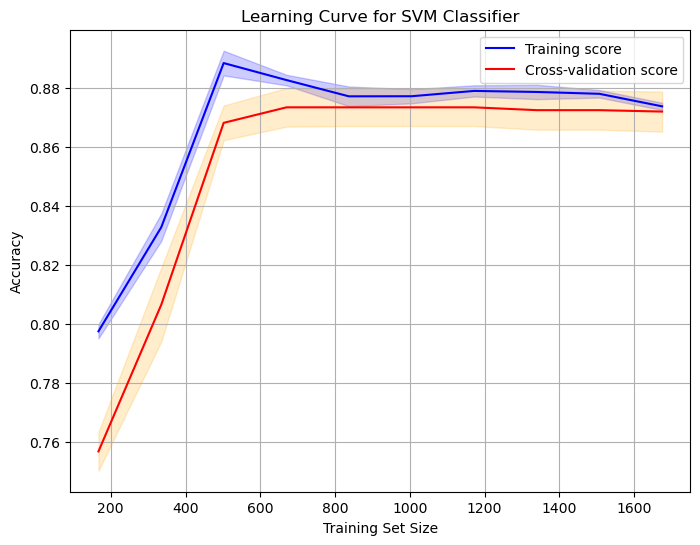

In [320]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                                 
    n_jobs=-1                           
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

plt.title('Learning Curve for SVM Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [337]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.300631,-0.191364,0.273670,0.110880,0.502518,1.211253,-0.985287,0.114774,-0.344815,0.0,0.263103,0.006288,-0.400853
1,0.628046,1.215662,0.502029,0.042400,0.849551,0.520622,2.318067,0.034093,-0.344815,0.0,0.263103,0.722034,0.848797
2,0.288148,-1.180506,0.616208,0.042400,1.060250,0.926875,3.327901,0.656427,-0.344815,0.0,0.898456,-0.811707,0.223972
3,0.887451,0.052561,-0.081556,0.167947,-0.303095,-1.266896,-0.061032,-0.296613,0.118032,0.0,0.263103,1.335530,-1.338091
4,-1.432038,-0.852357,0.641581,0.829924,0.304213,-0.291886,0.315516,-0.277704,1.043728,0.0,0.898456,-0.811707,1.473623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,-0.012557,1.060732,0.717701,0.270667,1.097432,0.683123,-0.429023,-0.253752,-0.344815,0.0,0.898456,-1.527452,-1.025678
2090,0.461157,0.677701,-0.436781,-0.767951,-0.129578,1.455006,-1.293372,0.655587,-0.807663,0.0,0.263103,1.028782,-0.713266
2091,0.848091,0.932430,-0.195735,-0.117388,-0.154366,-0.657515,-0.146611,-0.296613,0.118032,0.0,0.263103,0.926532,-1.338091
2092,0.379366,1.062217,0.857254,0.236427,1.332919,0.479996,-0.429023,-0.156683,-0.344815,0.0,0.263103,-0.913956,-1.025678


In [328]:
joblib.dump(clf,"model.joblib")

['model.joblib']

In [332]:
saved_model = joblib.load("model.joblib")
saved_model

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [333]:
y_pred = saved_model.predict(X_test)
r2_score(y_test,y_pred)

0.9719904659455353